In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(f"../data/SPX500_H1.csv", parse_dates=['Datetime'], index_col='Datetime')
df

,Open,High,Low,Close,Volume
Datetime,,,,,
2015-01-01 22:00:00+00:00,2058.0,2058.0,2058.0,2058.0,2
2015-01-01 23:00:00+00:00,2062.2,2065.2,2062.0,2065.2,287
2015-01-02 00:00:00+00:00,2065.2,2065.2,2063.6,2064.8,58
2015-01-02 01:00:00+00:00,2065.0,2067.6,2065.0,2067.0,283
2015-01-02 02:00:00+00:00,2066.8,2068.6,2066.6,2068.0,113
...,...,...,...,...,...
2025-02-13 10:00:00+00:00,6054.8,6058.2,6051.2,6056.8,1173
2025-02-13 11:00:00+00:00,6056.6,6061.6,6048.8,6054.8,2848
2025-02-13 12:00:00+00:00,6055.0,6056.8,6048.8,6053.8,2530


In [4]:
# Calculate HA-Close
df['HA_Close'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

# Create HA_Open column using NumPy
ha_open_values = np.zeros(len(df))
ha_open_values[0] = df['Open'].iloc[0]  # Initial HA_Open is set to the first open price

# Vectorized loop for HA_Open using NumPy
for i in range(1, len(df)):
    ha_open_values[i] = 0.5 * (ha_open_values[i - 1] + df['HA_Close'].iloc[i - 1])

# Assign HA_Open to DataFrame
df['HA_Open'] = ha_open_values

# Calculate HA-High and HA-Low (vectorized with Pandas)
df['HA_High'] = df[['High', 'HA_Open', 'HA_Close']].max(axis=1)
df['HA_Low'] = df[['Low', 'HA_Open', 'HA_Close']].min(axis=1)

df = df.reindex(columns=['Open', 'High', 'Low', 'Close', 'Volume', 'HA_Open', 'HA_High', 'HA_Low', 'HA_Close'])

df

,Open,High,Low,Close,Volume,HA_Open,HA_High,HA_Low,HA_Close
Datetime,,,,,,,,,
2015-01-01 22:00:00+00:00,2058.0,2058.0,2058.0,2058.0,2,2058.000000,2058.0,2058.00000,2058.00
2015-01-01 23:00:00+00:00,2062.2,2065.2,2062.0,2065.2,287,2058.000000,2065.2,2058.00000,2063.65
2015-01-02 00:00:00+00:00,2065.2,2065.2,2063.6,2064.8,58,2060.825000,2065.2,2060.82500,2064.70
2015-01-02 01:00:00+00:00,2065.0,2067.6,2065.0,2067.0,283,2062.762500,2067.6,2062.76250,2066.15
2015-01-02 02:00:00+00:00,2066.8,2068.6,2066.6,2068.0,113,2064.456250,2068.6,2064.45625,2067.50
...,...,...,...,...,...,...,...,...,...
2025-02-13 10:00:00+00:00,6054.8,6058.2,6051.2,6056.8,1173,6053.236639,6058.2,6051.20000,6055.25
2025-02-13 11:00:00+00:00,6056.6,6061.6,6048.8,6054.8,2848,6054.243319,6061.6,6048.80000,6055.45
2025-02-13 12:00:00+00:00,6055.0,6056.8,6048.8,6053.8,2530,6054.846660,6056.8,6048.80000,6053.60


In [5]:
# Identify Doji candles
df['Range'] = df['HA_High'] - df['HA_Low']
df['Body'] = np.abs(df['HA_Close'] - df['HA_Open'])
df['Middle'] = (df['HA_High'] + df['HA_Low']) / 2

# Identify Doji candles
df['Doji'] = ((df['Body'] <= df['Range'] * 0.1) & 
              (np.abs(df['HA_Open'] - df['Middle']) < (0.2 * df['Range'])))

df[df['Doji']]

,Open,High,Low,Close,Volume,HA_Open,HA_High,HA_Low,HA_Close,Range,Body,Middle,Doji
Datetime,,,,,,,,,,,,,
2015-01-02 08:00:00+00:00,2072.8,2073.2,2066.8,2066.8,677,2070.036816,2073.2,2066.8,2069.900,6.4,0.136816,2070.00,True
2015-01-02 12:00:00+00:00,2064.8,2067.8,2064.6,2067.2,115,2066.371051,2067.8,2064.6,2066.100,3.2,0.271051,2066.20,True
2015-01-02 21:00:00+00:00,2056.4,2056.8,2051.0,2052.4,1347,2053.696623,2056.8,2051.0,2054.150,5.8,0.453377,2053.90,True
2015-01-06 00:00:00+00:00,2026.0,2026.0,2021.2,2021.6,417,2023.753488,2026.0,2021.2,2023.700,4.8,0.053488,2023.60,True
2015-01-06 08:00:00+00:00,2024.2,2025.0,2017.2,2018.2,1082,2021.284584,2025.0,2017.2,2021.150,7.8,0.134584,2021.10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-12 19:00:00+00:00,6055.4,6065.1,6048.6,6061.9,1998,6056.292833,6065.1,6048.6,6057.750,16.5,1.457167,6056.85,True
2025-02-12 20:00:00+00:00,6062.4,6063.4,6049.0,6056.9,2336,6057.021416,6063.4,6049.0,6057.925,14.4,0.903584,6056.20,True
2025-02-13 02:00:00+00:00,6067.2,6068.2,6063.8,6067.0,509,6066.529576,6068.2,6063.8,6066.550,4.4,0.020424,6066.00,True


In [6]:
# Idenfity bullish candles with no lower wick
bullish_candles = 2
df['Bullish'] = (df['HA_Close'] > df['HA_Open']) & (df['HA_Low'] == df['HA_Open'])
df['Bullish_Streak'] = df['Bullish'].rolling(window=bullish_candles).sum() == bullish_candles

df[df['Bullish_Streak']]

,Open,High,Low,Close,Volume,HA_Open,HA_High,HA_Low,HA_Close,Range,Body,Middle,Doji,Bullish,Bullish_Streak
Datetime,,,,,,,,,,,,,,,
2015-01-02 00:00:00+00:00,2065.2,2065.2,2063.6,2064.8,58,2060.825000,2065.2,2060.825000,2064.700,4.375000,3.875000,2063.012500,False,True,True
2015-01-02 01:00:00+00:00,2065.0,2067.6,2065.0,2067.0,283,2062.762500,2067.6,2062.762500,2066.150,4.837500,3.387500,2065.181250,False,True,True
2015-01-02 02:00:00+00:00,2066.8,2068.6,2066.6,2068.0,113,2064.456250,2068.6,2064.456250,2067.500,4.143750,3.043750,2066.528125,False,True,True
2015-01-02 03:00:00+00:00,2068.2,2068.2,2067.8,2067.8,48,2065.978125,2068.2,2065.978125,2068.000,2.221875,2.021875,2067.089063,False,True,True
2015-01-02 04:00:00+00:00,2067.8,2069.4,2067.8,2069.4,50,2066.989062,2069.4,2066.989062,2068.600,2.410938,1.610938,2068.194531,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-11 21:00:00+00:00,6076.6,6078.0,6073.0,6074.6,313,6072.623848,6078.0,6072.623848,6075.550,5.376152,2.926152,6075.311924,False,True,True
2025-02-12 18:00:00+00:00,6067.0,6068.6,6052.6,6055.1,2464,6051.760665,6068.6,6051.760665,6060.825,16.839335,9.064335,6060.180333,False,True,True
2025-02-13 00:00:00+00:00,6067.8,6070.2,6064.8,6068.6,775,6061.868302,6070.2,6061.868302,6067.850,8.331698,5.981698,6066.034151,False,True,True


In [7]:
# Identify bearish trend
bearish_candles = 5
df['Bearish'] = (df['HA_Close'] < df['HA_Open'])
df['Bearish_Trend'] = df['Bearish'].rolling(window=bearish_candles).sum() == bearish_candles

df[df['Bearish_Trend']]

,Open,High,Low,Close,Volume,HA_Open,HA_High,HA_Low,HA_Close,Range,Body,Middle,Doji,Bullish,Bullish_Streak,Bearish,Bearish_Trend
Datetime,,,,,,,,,,,,,,,,,
2015-01-02 12:00:00+00:00,2064.8,2067.8,2064.6,2067.2,115,2066.371051,2067.800000,2064.6,2066.100,3.200000,0.271051,2066.200000,True,False,False,True,True
2015-01-02 19:00:00+00:00,2048.8,2056.0,2048.6,2053.4,2968,2052.686493,2056.000000,2048.6,2051.700,7.400000,0.986493,2052.300000,False,False,False,True,True
2015-01-05 14:00:00+00:00,2042.0,2046.0,2033.2,2033.6,2702,2046.471967,2046.471967,2033.2,2038.700,13.271967,7.771967,2039.835984,False,False,False,True,True
2015-01-05 15:00:00+00:00,2033.2,2037.0,2027.0,2030.0,4445,2042.585984,2042.585984,2027.0,2031.800,15.585984,10.785984,2034.792992,False,False,False,True,True
2015-01-05 16:00:00+00:00,2030.2,2030.8,2023.2,2029.0,3126,2037.192992,2037.192992,2023.2,2028.300,13.992992,8.892992,2030.196496,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-07 20:00:00+00:00,6030.6,6032.9,6020.4,6028.4,3880,6037.515761,6037.515761,6020.4,6028.075,17.115761,9.440761,6028.957881,False,False,False,True,True
2025-02-07 21:00:00+00:00,6028.1,6033.2,6028.1,6029.4,481,6032.795381,6033.200000,6028.1,6029.700,5.100000,3.095381,6030.650000,False,False,False,True,True
2025-02-09 23:00:00+00:00,6008.2,6039.2,6008.0,6037.6,2747,6031.247690,6039.200000,6008.0,6023.250,31.200000,7.997690,6023.600000,False,False,False,True,True


In [8]:
offset = 1
df['Signal'] = (df['Bearish_Trend'].shift(bullish_candles + 1 + offset) == True) & (df['Doji'].shift(bullish_candles + offset) == True) & (df['Bullish_Streak'].shift(offset))

df['Trade'] = df['Signal'].shift(1)

# Explicitly convert to bool using np.where
df['Trade'] = np.where(df['Trade'].isna(), False, df['Trade']).astype(bool)

df.at[df.index[0], 'Trade'] = False

df[df['Trade']]

,Open,High,Low,Close,Volume,HA_Open,HA_High,HA_Low,HA_Close,Range,Body,Middle,Doji,Bullish,Bullish_Streak,Bearish,Bearish_Trend,Signal,Trade
Datetime,,,,,,,,,,,,,,,,,,,
2015-01-27 21:00:00+00:00,2027.2,2042.8,2027.0,2041.6,717,2031.830866,2042.8,2027.000000,2034.65,15.800000,2.819134,2034.900000,False,False,False,False,False,False,True
2015-02-26 05:00:00+00:00,2114.0,2114.4,2113.2,2113.6,27,2113.486670,2114.4,2113.200000,2113.80,1.200000,0.313330,2113.800000,False,False,False,False,False,False,True
2015-04-20 00:00:00+00:00,2086.6,2086.6,2084.6,2086.0,57,2083.949916,2086.6,2083.949916,2085.95,2.650084,2.000084,2085.274958,False,True,True,False,False,False,True
2015-05-17 23:00:00+00:00,2121.2,2121.6,2120.8,2120.8,18,2121.316123,2121.6,2120.800000,2121.10,0.800000,0.216123,2121.200000,False,False,False,True,False,False,True
2015-05-26 23:00:00+00:00,2106.6,2107.2,2105.4,2105.8,72,2106.569610,2107.2,2105.400000,2106.25,1.800000,0.319610,2106.300000,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-25 19:00:00+00:00,5044.3,5062.0,5043.5,5054.6,3250,5040.092685,5062.0,5040.092685,5051.10,21.907315,11.007315,5051.046343,False,True,True,False,False,False,True
2024-05-30 11:00:00+00:00,5250.8,5252.8,5249.2,5249.8,526,5248.013940,5252.8,5248.013940,5250.65,4.786060,2.636060,5250.406970,False,True,False,False,False,False,True
2024-09-09 03:00:00+00:00,5423.6,5427.8,5423.6,5426.8,312,5418.951134,5427.8,5418.951134,5425.45,8.848866,6.498866,5423.375567,False,True,True,False,False,False,True


In [9]:
# Calculate PnL for next 1, 2, 3... candles after confirmation
candles = [1, 2, 3, 4, 5, 10, 25, 50, 100]
for i in candles:
    df[f'Ret_{i}'] = (df['Close'].shift(-i + 1) / df['Open']) - 1
df

,Open,High,Low,Close,Volume,HA_Open,HA_High,HA_Low,HA_Close,Range,...,Trade,Ret_1,Ret_2,Ret_3,Ret_4,Ret_5,Ret_10,Ret_25,Ret_50,Ret_100
Datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 22:00:00+00:00,2058.0,2058.0,2058.0,2058.0,2,2058.000000,2058.0,2058.00000,2058.00,0.00000,...,False,0.000000,0.003499,0.003304,0.004373,0.004859,0.007191,-0.005734,-0.017687,-0.009135
2015-01-01 23:00:00+00:00,2062.2,2065.2,2062.0,2065.2,287,2058.000000,2065.2,2058.00000,2063.65,7.20000,...,False,0.001455,0.001261,0.002328,0.002813,0.002716,0.002231,-0.008535,-0.019203,-0.012026
2015-01-02 00:00:00+00:00,2065.2,2065.2,2063.6,2064.8,58,2060.825000,2065.2,2060.82500,2064.70,4.37500,...,False,-0.000194,0.000872,0.001356,0.001259,0.002034,0.000387,-0.007747,-0.020337,-0.012590
2015-01-02 01:00:00+00:00,2065.0,2067.6,2065.0,2067.0,283,2062.762500,2067.6,2062.76250,2066.15,4.83750,...,False,0.000969,0.001453,0.001356,0.002131,0.001646,0.000678,-0.008039,-0.021404,-0.012688
2015-01-02 02:00:00+00:00,2066.8,2068.6,2066.6,2068.0,113,2064.456250,2068.6,2064.45625,2067.50,4.14375,...,False,0.000581,0.000484,0.001258,0.000774,0.001548,-0.001064,-0.006967,-0.022740,-0.013354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-13 10:00:00+00:00,6054.8,6058.2,6051.2,6056.8,1173,6053.236639,6058.2,6051.20000,6055.25,7.00000,...,False,0.000330,0.000000,-0.000165,0.002213,0.002560,NaN,NaN,NaN,NaN
2025-02-13 11:00:00+00:00,6056.6,6061.6,6048.8,6054.8,2848,6054.243319,6061.6,6048.80000,6055.45,12.80000,...,False,-0.000297,-0.000462,0.001915,0.002262,NaN,NaN,NaN,NaN,NaN
2025-02-13 12:00:00+00:00,6055.0,6056.8,6048.8,6053.8,2530,6054.846660,6056.8,6048.80000,6053.60,8.00000,...,False,-0.000198,0.002180,0.002527,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Generate column names
ret_columns = [f'Ret_{candle}' for candle in candles]

# Filter the DataFrame where 'Trade' is True
sys_results = df[df['Trade']][ret_columns]
remaining_rows = df[~df['Trade']][ret_columns]

# Calculate profits and losses separately for each column
sys_profits = sys_results[sys_results > 0].sum()
sys_losses = abs(sys_results[sys_results < 0].sum())
bench_profits = remaining_rows[remaining_rows > 0].sum()
bench_losses = abs(remaining_rows[remaining_rows < 0].sum())

# Calculate the profit factor directly
sys_pf = sys_profits / sys_losses
bench_pf = bench_profits / bench_losses

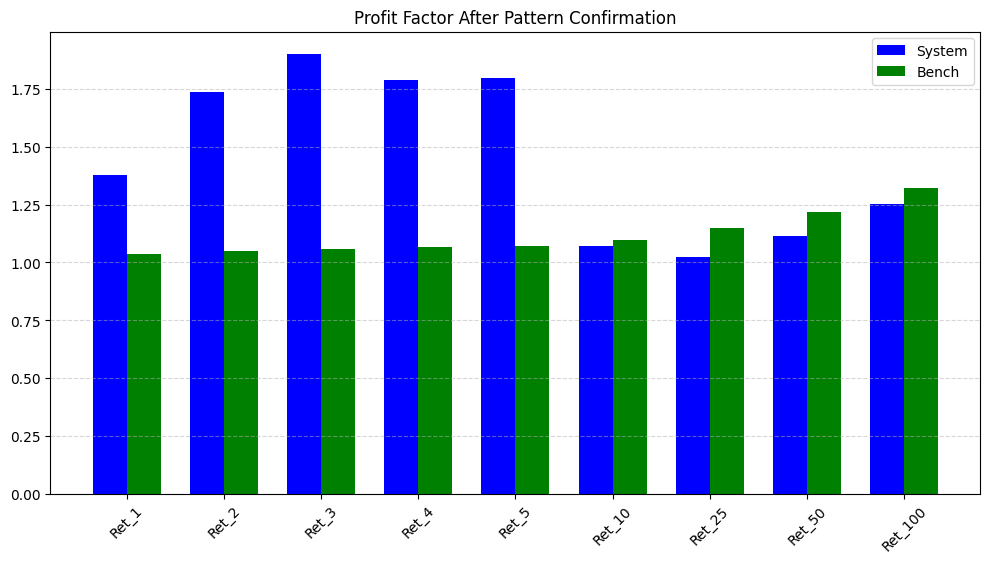

In [11]:
# Plot Profit Factor
plt.figure(figsize=(12, 6))
bar_width = 0.35

x_pos = np.arange(len(ret_columns))

# Plot system PnL
plt.bar(x_pos - bar_width/2, sys_pf, width=bar_width, color='blue', label='System')

# Plot random PnL
plt.bar(x_pos + bar_width/2, bench_pf, width=bar_width, color='green', label='Bench')

# Plot formatting
plt.title('Profit Factor After Pattern Confirmation')
plt.xticks(np.arange(len(ret_columns)), ret_columns, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [12]:
#create empty list for trades
starting_balance = 10000
trades_list = []
trade_open = False
balance = starting_balance
balance_history = []
hold_duration = 5

#iterate through rows to work out entries and exits
for i, row in df.iterrows():
    #if there is currently no trade
    if not trade_open:
        #check if long signal was generated and enter at the same time
        if row["Trade"] == True:
            entry_date = i
            entry_price = row.Open
            trade_open = True
            counter = 0
            position_size = 50 # Position size in units
    #check if a trade is already open
    if trade_open:
        if counter == hold_duration:
            exit_price = row.Close
            trade_open = False
        else:
            counter += 1

        if not trade_open: # If trade has been closed
            exit_date = i
            trade_open = False
            pnl = (exit_price - entry_price) * position_size  # PnL in currency terms
            balance += pnl  # Update balance with PnL
            
            #store trade data in a list
            trade = [entry_date, entry_price, exit_date, exit_price, position_size, pnl, balance]
            #append trade to overall trade list
            trades_list.append(trade)

    # Store balance and equity
    balance_history.append(balance)

trades = pd.DataFrame(trades_list, columns=["Entry_Date", "Entry_Price", "Exit_Date", "Exit_Price", "Position_Size", "PnL", "Balance"])

#calculate return of each trade as well as the trade duration
trades["Return"] = trades.Balance / trades.Balance.shift(1)

In [13]:
trades

,Entry_Date,Entry_Price,Exit_Date,Exit_Price,Position_Size,PnL,Balance,Return
0,2015-01-27 21:00:00+00:00,2027.2,2015-01-28 02:00:00+00:00,2040.8,50,680.0,10680.0,NaN
1,2015-02-26 05:00:00+00:00,2114.0,2015-02-26 10:00:00+00:00,2115.6,50,80.0,10760.0,1.007491
2,2015-04-20 00:00:00+00:00,2086.6,2015-04-20 05:00:00+00:00,2087.4,50,40.0,10800.0,1.003717
3,2015-05-17 23:00:00+00:00,2121.2,2015-05-18 04:00:00+00:00,2120.6,50,-30.0,10770.0,0.997222
4,2015-05-26 23:00:00+00:00,2106.6,2015-05-27 04:00:00+00:00,2105.0,50,-80.0,10690.0,0.992572
...,...,...,...,...,...,...,...,...
116,2024-04-25 19:00:00+00:00,5044.3,2024-04-26 01:00:00+00:00,5094.4,50,2505.0,23340.0,1.120230
117,2024-05-30 11:00:00+00:00,5250.8,2024-05-30 16:00:00+00:00,5259.4,50,430.0,23770.0,1.018423
118,2024-09-09 03:00:00+00:00,5423.6,2024-09-09 08:00:00+00:00,5443.4,50,990.0,24760.0,1.041649
119,2024-10-08 11:00:00+00:00,5728.8,2024-10-08 16:00:00+00:00,5749.5,50,1035.0,25795.0,1.041801


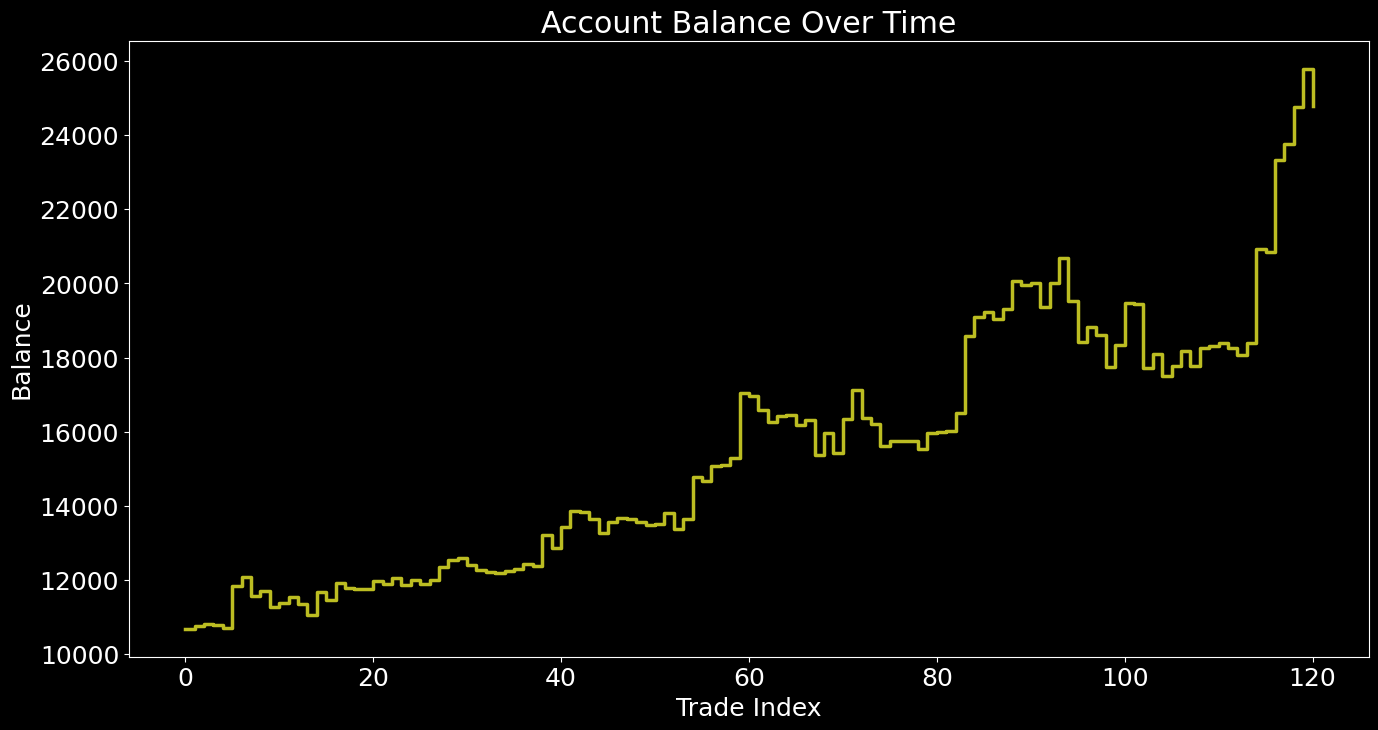

In [ ]:
# Apply dark background style
plt.style.use("dark_background")

# Update figure settings
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams.update({"font.size": 18})

# Create the plot
plt.figure()
plt.title("Account Balance Over Time")

# Olive step plot for cumulative returns
plt.step(trades.index, trades["Balance"], color="tab:olive", linewidth=2.5, where="post")

# Add grid for readability
#plt.grid(True, linestyle="--", alpha=0.5)

# Add labels
plt.xlabel("Trade Index")
plt.ylabel("Balance")

plt.savefig("plot.png", format="png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()
